In [1]:
import pandas as pd
import numpy as np
fashion_subset = pd.read_csv("fashion_subset.csv")

In [2]:
fashion_subset.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,tokenized_text_title,tokenized_text_description
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,"['mlb', 'cincinnati', 'reds', 't', 'shirt', 's...","['no', 'description', 'yet']"
1,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,"['ava-viv', 'blouse']","['adorable', 'top', 'with', 'a', 'hint', 'of',..."
2,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,"['24k', 'gold', 'plated', 'rose']","['complete', 'with', 'certificate', 'of', 'aut..."
3,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma...","['bundled', 'items', 'requested', 'for', 'ruie']","['banana', 'republic', 'bottoms', ',', 'candie..."
4,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...,"['acacia', 'pacific', 'tides', 'santorini', 't...","['size', 'small', 'but', 'straps', 'slightly',..."


In [3]:
# One-Hot Encoding using pandas
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
fashion_subset['category_label'] = label_encoder.fit_transform(fashion_subset['category_name'])
fashion_subset['brand_name_label'] = label_encoder.fit_transform(fashion_subset['brand_name'])

In [4]:
#fashion_subset['category_name']= fashion_subset['category_name'].astype('category').cat.codes

In [5]:
#fashion_subset['brand_name']= fashion_subset['brand_name'].astype('category').cat.codes

In [6]:
#fashion_corr_df = fashion_subset.iloc[:,1:6]

In [7]:
#fashion_corr_df.corr()

In [8]:
condition_price = fashion_subset.groupby(['category_name', 'item_condition_id'])['price'].mean().reset_index()

In [9]:
top_10_cats = fashion_subset.groupby(['category_name'])['price'].count().sort_values(ascending = False).head(10).reset_index()

In [10]:
top_10_cats

,category_name,price
0,"Women/Athletic Apparel/Pants, Tights, Leggings",60177
1,Women/Tops & Blouses/T-Shirts,46380
2,Women/Underwear/Bras,21274
3,"Women/Tops & Blouses/Tank, Cami",20284
4,Women/Tops & Blouses/Blouse,20284
5,"Women/Dresses/Above Knee, Mini",20082
6,Women/Jewelry/Necklaces,19758
7,Women/Athletic Apparel/Shorts,19528
8,Women/Shoes/Boots,18864
9,Beauty/Fragrance/Women,18628


In [11]:
condition_price_subset = condition_price[condition_price['category_name'].isin(list(top_10_cats['category_name']))]

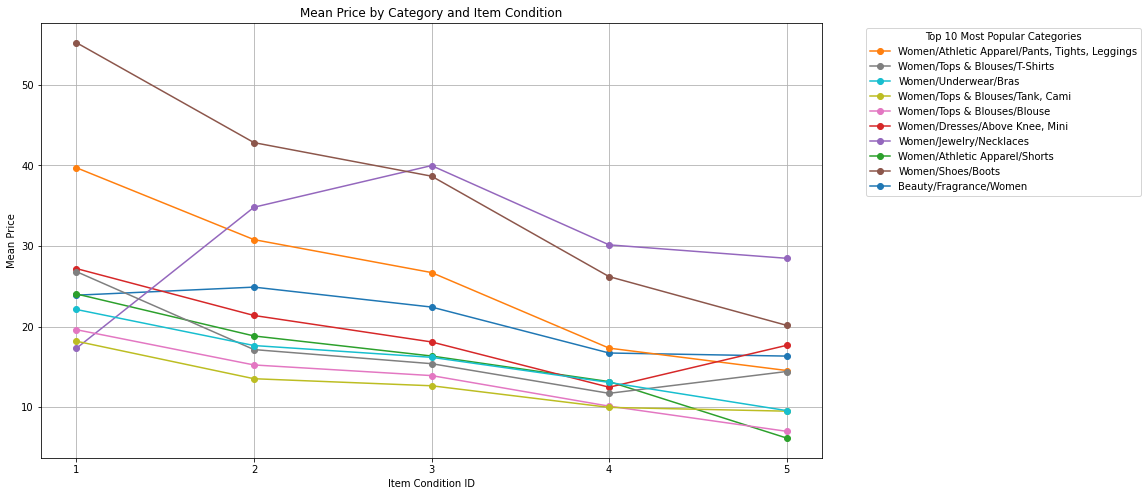

In [12]:
# Pivot the table for better visualization
import matplotlib.pyplot as plt
pivot_table = condition_price_subset.pivot(index='item_condition_id', columns='category_name', values='price')

# Plot the pivot table
ax = pivot_table.plot(kind='line', marker='o', figsize=(14, 8))
plt.xlabel('Item Condition ID')
plt.ylabel('Mean Price')
plt.title('Mean Price by Category and Item Condition')
plt.grid(True)
plt.xticks(range(1, 6))
# Get handles and labels from the plot
handles, labels = ax.get_legend_handles_labels()

# Reorder handles and labels
reordered_handles = [handles[i] for i in [1,7,9,8,6,3,4,2,5,0]]
reordered_labels = [labels[i] for i in [1,7,9,8,6,3,4,2,5,0]]

# Create a new legend
plt.legend(reordered_handles, reordered_labels, title='Top 10 Most Popular Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [13]:
# Preprocess your text data (tokenization, lowercase, etc.) if necessary
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fashion_subset.drop('price', axis=1), fashion_subset['price'], test_size=0.2, random_state=42)

In [14]:
# Preprocess your text data (tokenization, lowercase, etc.) if necessary
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
# TF-IDF Vectorization
name_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
item_description_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_train['item_description'].fillna('', inplace=True)
name_matrix = name_vectorizer.fit_transform(X_train['name'])
item_description_matrix = item_description_vectorizer.fit_transform(X_train['item_description'])

# Convert other features to a matrix (assuming feature1 is a numerical feature)
other_features = X_train[['item_condition_id', 'shipping', 'category_label', 'brand_name_label']].values

# Combine TF-IDF vectors with other features
X_train_stack = hstack([name_matrix, item_description_matrix, other_features])

In [15]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
kmeans = MiniBatchKMeans(n_clusters=100, random_state=42, batch_size=164, max_iter=100)
kmeans.fit(X_train_stack)
y_pred = kmeans.predict(X_train_stack)

In [16]:
y_train = pd.DataFrame(y_train)

In [17]:
y_train['Cluster'] = y_pred

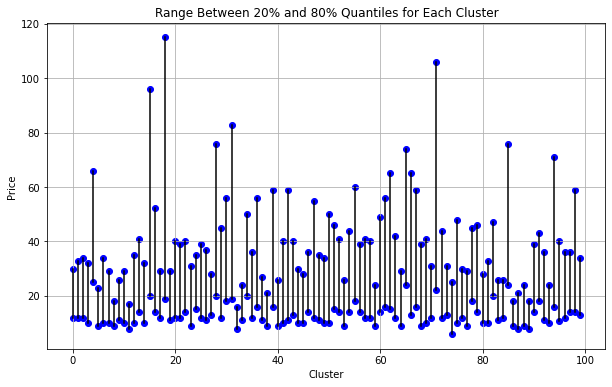

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

grouped_data = y_train.groupby('Cluster')

# Create lists to store quantiles
clusters = []
quantile_25 = []
quantile_75 = []

# Calculate 25% and 75% quantiles for each cluster
for cluster, cluster_data in grouped_data:
    # Calculate 25% and 75% quantiles
    q25 = cluster_data['price'].quantile(0.20)
    q75 = cluster_data['price'].quantile(0.80)
    
    # Append data to lists
    clusters.append(cluster)
    quantile_25.append(q25)
    quantile_75.append(q75)

# Create a line plot showing the range (25% to 75% quantiles) for each cluster
plt.figure(figsize=(10, 6))
for i in range(len(clusters)):
    plt.plot([clusters[i], clusters[i]], [quantile_25[i], quantile_75[i]], color='black')
    plt.scatter([clusters[i], clusters[i]], [quantile_25[i], quantile_75[i]], color='blue')  # Mark the quantiles with points
plt.xlabel('Cluster')
plt.ylabel('Price')
plt.title('Range Between 20% and 80% Quantiles for Each Cluster')
plt.grid(True)
plt.show()


In [19]:
grouped_data = y_train.groupby('Cluster')
cluster_quantile_dict = {}
# Iterate through clusters and print quantile ranges
for cluster, cluster_data in grouped_data:
    # Calculate 25% and 75% quantiles of 'price' for the current cluster
    q20 = cluster_data['price'].quantile(0.20)
    q80 = cluster_data['price'].quantile(0.80)
    cluster_quantile_dict[cluster] = (q20, q80)

In [20]:
# Preprocess your text data (tokenization, lowercase, etc.) if necessary
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
# TF-IDF Vectorization
X_test['item_description'].fillna('', inplace=True)
name_matrix = name_vectorizer.transform(X_test['name'])
item_description_matrix = item_description_vectorizer.transform(X_test['item_description'])

# Convert other features to a matrix (assuming feature1 is a numerical feature)
other_features = X_test[['item_condition_id', 'shipping', 'category_label', 'brand_name_label']].values

# Combine TF-IDF vectors with other features
X_test_stack = hstack([name_matrix, item_description_matrix, other_features])

In [21]:
y_pred = kmeans.predict(X_test_stack)

In [22]:
y_test = pd.DataFrame(y_test)
y_test['Cluster'] = y_pred

In [35]:
def add_range(row):
    cluster = int(row['Cluster'])
    return cluster_quantile_dict[cluster]
y_test['Range'] = y_test.apply(add_range, axis = 1)

TypeError: add_range() got an unexpected keyword argument 'axis'

In [24]:
def add_midpoint(row):
    cluster = int(row['Cluster'])
    middle_range = (cluster_quantile_dict[cluster][0] + cluster_quantile_dict[cluster][1])/2
    return middle_range
y_test['Midpoint'] = y_test.apply(add_midpoint, axis = 1)

In [25]:
# Function to calculate RLMSE
def calculate_rlmse(y_true, y_pred):
    """
    Calculate Root Mean Squared Logarithmic Error (RLMSE).
    
    Args:
    - y_true: array-like, true values
    - y_pred: array-like, predicted values
    
    Returns:
    - RLMSE
    """
    # Convert to numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Ensure non-negative values
    y_true = np.maximum(0, y_true)
    y_pred = np.maximum(0, y_pred)
    
    # Calculate log of true and predicted values
    log_y_true = np.log1p(y_true)
    log_y_pred = np.log1p(y_pred)
    
    # Calculate squared differences
    squared_diff = (log_y_true - log_y_pred) ** 2
    
    # Calculate mean squared error
    mean_squared_error = np.mean(squared_diff)
    
    # Calculate RLMSE
    rlmse = np.sqrt(mean_squared_error)
    
    return rlmse

# Example usage
# Assuming df is your DataFrame and 'actual_column' and 'predicted_column' are the column names
# Replace 'actual_column' and 'predicted_column' with your actual column names
actual_values = y_test['price']
predicted_values = y_test['Midpoint']

rlmse = calculate_rlmse(actual_values, predicted_values)
print("RLMSE:", rlmse)

RLMSE: 0.6831566612995345


In [27]:
# Testing Model parameters
# 0.63 accuracy currently

# Training data
kmeans = MiniBatchKMeans(n_clusters=250, random_state=42, batch_size=164, max_iter=100)
kmeans.fit(X_train_stack)
y_train = pd.DataFrame(y_train)
y_pred = kmeans.predict(X_train_stack)
y_train['Cluster'] = y_pred

grouped_data = y_train.groupby('Cluster')
cluster_quantile_dict = {}
# Iterate through clusters and print quantile ranges
for cluster, cluster_data in grouped_data:
    # Calculate 25% and 75% quantiles of 'price' for the current cluster
    q20 = cluster_data['price'].quantile(0.20)
    q80 = cluster_data['price'].quantile(0.80)
    cluster_quantile_dict[cluster] = (q20, q80)

y_pred = kmeans.predict(X_test_stack)
y_test['Cluster'] = y_pred
y_test['Range'] = y_test.apply(add_range, axis = 1)
y_test['Midpoint'] = y_test.apply(add_midpoint, axis = 1)
actual_values = y_test['price']
predicted_values = y_test['Midpoint']

rlmse = calculate_rlmse(actual_values, predicted_values)
print("RLMSE:", rlmse)
    


RLMSE: 0.645624851180596


In [28]:
# Testing Model parameters
# 0.63 accuracy currently

# Training data
kmeans = MiniBatchKMeans(n_clusters=500, random_state=42, batch_size=164, max_iter=100)
kmeans.fit(X_train_stack)
y_train = pd.DataFrame(y_train)
y_pred = kmeans.predict(X_train_stack)
y_train['Cluster'] = y_pred

grouped_data = y_train.groupby('Cluster')
cluster_quantile_dict = {}
# Iterate through clusters and print quantile ranges
for cluster, cluster_data in grouped_data:
    # Calculate 25% and 75% quantiles of 'price' for the current cluster
    q20 = cluster_data['price'].quantile(0.20)
    q80 = cluster_data['price'].quantile(0.80)
    cluster_quantile_dict[cluster] = (q20, q80)

y_pred = kmeans.predict(X_test_stack)
y_test['Cluster'] = y_pred
y_test['Range'] = y_test.apply(add_range, axis = 1)
y_test['Midpoint'] = y_test.apply(add_midpoint, axis = 1)
actual_values = y_test['price']
predicted_values = y_test['Midpoint']

rlmse = calculate_rlmse(actual_values, predicted_values)
print("RLMSE:", rlmse)
    


RLMSE: 0.6241809399394987


In [29]:
# Testing Model parameters
# 0.63 accuracy currently

# Training data
kmeans = MiniBatchKMeans(n_clusters=500, random_state=42, batch_size=256, max_iter=100)
kmeans.fit(X_train_stack)
y_train = pd.DataFrame(y_train)
y_pred = kmeans.predict(X_train_stack)
y_train['Cluster'] = y_pred

grouped_data = y_train.groupby('Cluster')
cluster_quantile_dict = {}
# Iterate through clusters and print quantile ranges
for cluster, cluster_data in grouped_data:
    # Calculate 25% and 75% quantiles of 'price' for the current cluster
    q20 = cluster_data['price'].quantile(0.20)
    q80 = cluster_data['price'].quantile(0.80)
    cluster_quantile_dict[cluster] = (q20, q80)

y_pred = kmeans.predict(X_test_stack)
y_test['Cluster'] = y_pred
y_test['Range'] = y_test.apply(add_range, axis = 1)
y_test['Midpoint'] = y_test.apply(add_midpoint, axis = 1)
actual_values = y_test['price']
predicted_values = y_test['Midpoint']

rlmse = calculate_rlmse(actual_values, predicted_values)
print("RLMSE:", rlmse)

RLMSE: 0.6164430170884618


In [30]:
# Training data
kmeans = MiniBatchKMeans(n_clusters=500, random_state=42, batch_size=84, max_iter=100)
kmeans.fit(X_train_stack)
y_train = pd.DataFrame(y_train)
y_pred = kmeans.predict(X_train_stack)
y_train['Cluster'] = y_pred

grouped_data = y_train.groupby('Cluster')
cluster_quantile_dict = {}
# Iterate through clusters and print quantile ranges
for cluster, cluster_data in grouped_data:
    # Calculate 25% and 75% quantiles of 'price' for the current cluster
    q20 = cluster_data['price'].quantile(0.20)
    q80 = cluster_data['price'].quantile(0.80)
    cluster_quantile_dict[cluster] = (q20, q80)

y_pred = kmeans.predict(X_test_stack)
y_test['Cluster'] = y_pred
y_test['Range'] = y_test.apply(add_range, axis = 1)
y_test['Midpoint'] = y_test.apply(add_midpoint, axis = 1)
actual_values = y_test['price']
predicted_values = y_test['Midpoint']

rlmse = calculate_rlmse(actual_values, predicted_values)
print("RLMSE:", rlmse)

RLMSE: 0.6185215923455587


In [31]:
# Training data
kmeans = MiniBatchKMeans(n_clusters=1000, random_state=42, batch_size=84, max_iter=100)
kmeans.fit(X_train_stack)
y_train = pd.DataFrame(y_train)
y_pred = kmeans.predict(X_train_stack)
y_train['Cluster'] = y_pred

grouped_data = y_train.groupby('Cluster')
cluster_quantile_dict = {}
# Iterate through clusters and print quantile ranges
for cluster, cluster_data in grouped_data:
    # Calculate 25% and 75% quantiles of 'price' for the current cluster
    q20 = cluster_data['price'].quantile(0.20)
    q80 = cluster_data['price'].quantile(0.80)
    cluster_quantile_dict[cluster] = (q20, q80)

y_pred = kmeans.predict(X_test_stack)
y_test['Cluster'] = y_pred
y_test['Range'] = y_test.apply(add_range, axis = 1)
y_test['Midpoint'] = y_test.apply(add_midpoint, axis = 1)
actual_values = y_test['price']
predicted_values = y_test['Midpoint']

rlmse = calculate_rlmse(actual_values, predicted_values)
print("RLMSE:", rlmse)

RLMSE: 0.597678751469375


In [32]:
# Training data
kmeans = MiniBatchKMeans(n_clusters=2000, random_state=42, batch_size=256, max_iter=100)
kmeans.fit(X_train_stack)
y_train = pd.DataFrame(y_train)
y_pred = kmeans.predict(X_train_stack)
y_train['Cluster'] = y_pred

grouped_data = y_train.groupby('Cluster')
cluster_quantile_dict = {}
# Iterate through clusters and print quantile ranges
for cluster, cluster_data in grouped_data:
    # Calculate 25% and 75% quantiles of 'price' for the current cluster
    q20 = cluster_data['price'].quantile(0.20)
    q80 = cluster_data['price'].quantile(0.80)
    cluster_quantile_dict[cluster] = (q20, q80)

y_pred = kmeans.predict(X_test_stack)
y_test['Cluster'] = y_pred
y_test['Range'] = y_test.apply(add_range, axis = 1)
y_test['Midpoint'] = y_test.apply(add_midpoint, axis = 1)
actual_values = y_test['price']
predicted_values = y_test['Midpoint']

rlmse = calculate_rlmse(actual_values, predicted_values)
print("RLMSE:", rlmse)

RLMSE: 0.5675941034894061


In [33]:
# Training data
kmeans = MiniBatchKMeans(n_clusters=5000, random_state=42, batch_size=256, max_iter=100)
kmeans.fit(X_train_stack)
y_train = pd.DataFrame(y_train)
y_pred = kmeans.predict(X_train_stack)
y_train['Cluster'] = y_pred

grouped_data = y_train.groupby('Cluster')
cluster_quantile_dict = {}
# Iterate through clusters and print quantile ranges
for cluster, cluster_data in grouped_data:
    # Calculate 25% and 75% quantiles of 'price' for the current cluster
    q20 = cluster_data['price'].quantile(0.20)
    q80 = cluster_data['price'].quantile(0.80)
    cluster_quantile_dict[cluster] = (q20, q80)

y_pred = kmeans.predict(X_test_stack)
y_test['Cluster'] = y_pred
y_test['Range'] = y_test.apply(add_range, axis = 1)
y_test['Midpoint'] = y_test.apply(add_midpoint, axis = 1)
actual_values = y_test['price']
predicted_values = y_test['Midpoint']

rlmse = calculate_rlmse(actual_values, predicted_values)
print("RLMSE:", rlmse)

RLMSE: 0.550882624198767


In [26]:
X = np.load("full_item_embeddings.npy")

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, fashion_subset['price'], test_size=0.2, random_state=42)
X_train_stack = X_train
X_test_stack = X_test
y_test = pd.DataFrame(y_test)

In [31]:
# Training data
kmeans = MiniBatchKMeans(n_clusters=5000, random_state=42, batch_size=256, max_iter=100)
kmeans.fit(X_train_stack)
y_train = pd.DataFrame(y_train)
y_pred = kmeans.predict(X_train_stack)
y_train['Cluster'] = y_pred

grouped_data = y_train.groupby('Cluster')
cluster_quantile_dict = {}
# Iterate through clusters and print quantile ranges
for cluster, cluster_data in grouped_data:
    # Calculate 25% and 75% quantiles of 'price' for the current cluster
    q20 = cluster_data['price'].quantile(0.20)
    q80 = cluster_data['price'].quantile(0.80)
    cluster_quantile_dict[cluster] = (q20, q80)

y_pred = kmeans.predict(X_test_stack)
y_test['Cluster'] = y_pred
y_test['Range'] = y_test.apply(add_range, axis = 1)
y_test['Midpoint'] = y_test.apply(add_midpoint, axis = 1)
actual_values = y_test['price']
predicted_values = y_test['Midpoint']

rlmse = calculate_rlmse(actual_values, predicted_values)
print("RLMSE:", rlmse)

TypeError: add_range() got an unexpected keyword argument 'axis'

In [48]:
len(y_pred)

155912

In [49]:
len(y_test)

155912

In [50]:
y_test = pd.DataFrame(y_test)
y_test['Cluster'] = y_pred
y_test['Range'] = y_test.apply(add_range, axis = 1)
y_test['Midpoint'] = y_test.apply(add_midpoint, axis = 1)
actual_values = y_test['price']
predicted_values = y_test['Midpoint']

rlmse = calculate_rlmse(actual_values, predicted_values)
print("RLMSE:", rlmse)

RLMSE: 0.5215313252617204


In [ ]:
y_pred = kmeans.predict(X_train_stack)
X_train['Cluster'] = y_pred

In [ ]:
X_train[X_train['Cluster'] == 9]